In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("E:\ML Projects\Downloads\session_12\session 12\sales.csv")

In [5]:
data.head()

,Date,Amount
0,1/1/2000,510
1,2/1/2000,515
2,3/1/2000,530
3,4/1/2000,527
4,5/1/2000,519


In [7]:
data["Date"] = pd.to_datetime(data["Date"])

In [11]:
data.set_index("Date",inplace = True)
data.head()

,Amount
Date,
2000-01-01,510
2000-02-01,515
2000-03-01,530
2000-04-01,527
2000-05-01,519


<Axes: xlabel='Date'>

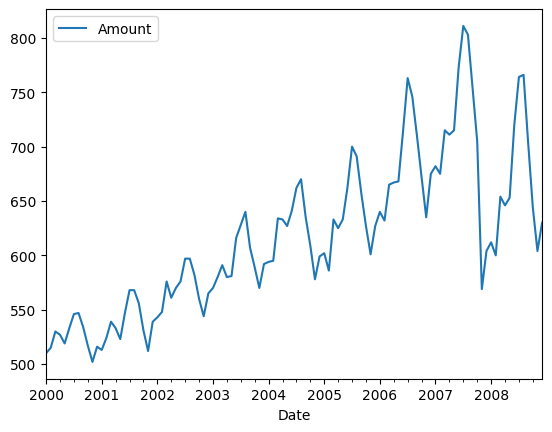

In [15]:
data.plot()

In [19]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def adf_test(d):
    result = adfuller(d)
    print("p value -->",result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis.Data is stationary")
    else:
        print("Accept the null hypothesis, Data is not Stationary")

In [23]:
adf_test(data["Amount"])

p value --> 0.5644352099925031
Accept the null hypothesis, Data is not Stationary


In [25]:
data["First Difference"] = data["Amount"]-data["Amount"].shift(1)

In [27]:
data.head()

,Amount,First Difference
Date,,
2000-01-01,510,NaN
2000-02-01,515,5.0
2000-03-01,530,15.0
2000-04-01,527,-3.0
2000-05-01,519,-8.0


In [29]:
adf_test(data["First Difference"].dropna())

p value --> 0.07478507605167106
Accept the null hypothesis, Data is not Stationary


In [31]:
data["Second Difference"] = data["First Difference"] - data["First Difference"].shift(1)

In [33]:
data.head()

,Amount,First Difference,Second Difference
Date,,,
2000-01-01,510,NaN,NaN
2000-02-01,515,5.0,NaN
2000-03-01,530,15.0,10.0
2000-04-01,527,-3.0,-18.0
2000-05-01,519,-8.0,-5.0


In [35]:
adf_test(data["Second Difference"].dropna())

p value --> 3.4877399176947928e-15
Reject the null hypothesis.Data is stationary


In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

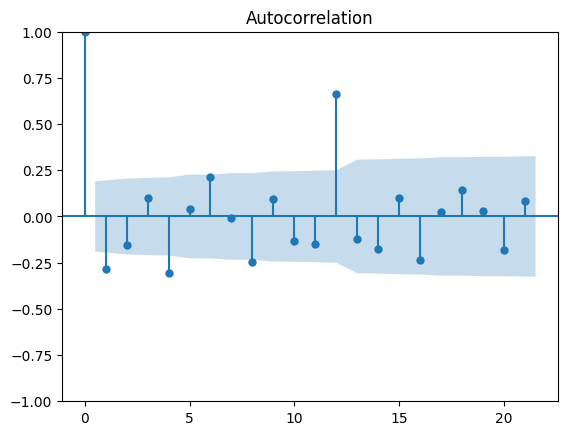

In [39]:
plot1 = plot_acf(data["Second Difference"].dropna())

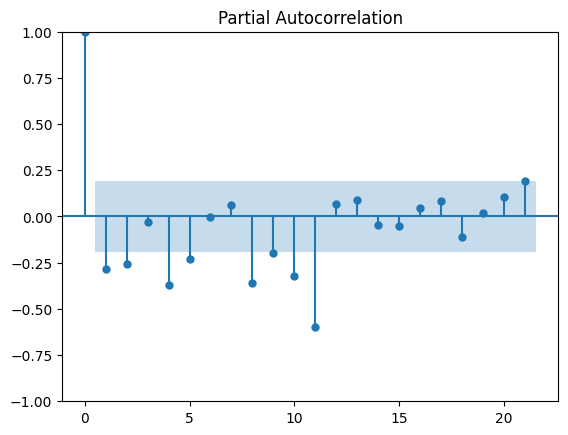

In [43]:
plot2 = plot_pacf(data["Second Difference"].dropna())

In [45]:
data["Seasonal Difference"] = data["Amount"] - data["Amount"].shift(12)

In [47]:
data

,Amount,First Difference,Second Difference,Seasonal Difference
Date,,,,
2000-01-01,510,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN
2000-03-01,530,15.0,10.0,NaN
2000-04-01,527,-3.0,-18.0,NaN
2000-05-01,519,-8.0,-5.0,NaN
...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0
2008-09-01,703,-63.0,-65.0,-51.0
2008-10-01,644,-59.0,4.0,-61.0


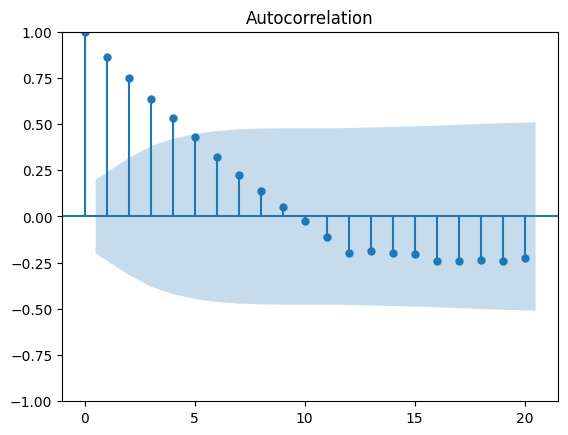

In [49]:
plot3 = plot_acf(data["Seasonal Difference"].dropna())

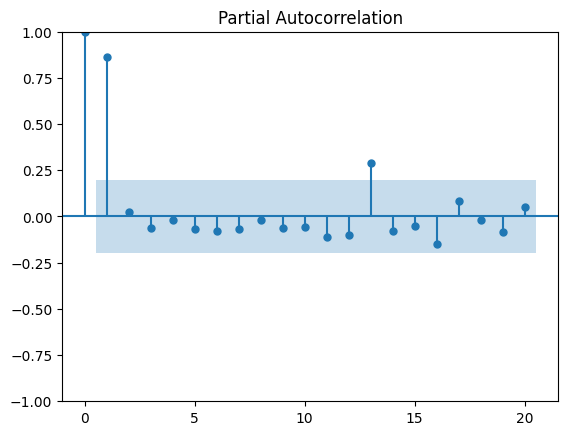

In [53]:
plot4 = plot_pacf(data["Seasonal Difference"].dropna())

In [55]:
from datetime import datetime

In [57]:
train_data = data

In [59]:
train_data

,Amount,First Difference,Second Difference,Seasonal Difference
Date,,,,
2000-01-01,510,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN
2000-03-01,530,15.0,10.0,NaN
2000-04-01,527,-3.0,-18.0,NaN
2000-05-01,519,-8.0,-5.0,NaN
...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0
2008-09-01,703,-63.0,-65.0,-51.0
2008-10-01,644,-59.0,4.0,-61.0


In [61]:
from statsmodels.tsa.arima.model import ARIMA
modela = ARIMA(train_data["Amount"],order = (17,2,3))
arima_model = modela.fit()

In [63]:
predicteda = arima_model.predict(start=datetime(2003,1,1),end= datetime(2008,12,1))

In [65]:
train_data["Predicted_arima"] = predicteda

In [67]:
train_data

,Amount,First Difference,Second Difference,Seasonal Difference,Predicted_arima
Date,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.077838
2008-09-01,703,-63.0,-65.0,-51.0,736.171677
2008-10-01,644,-59.0,4.0,-61.0,649.999135


<Axes: xlabel='Date'>

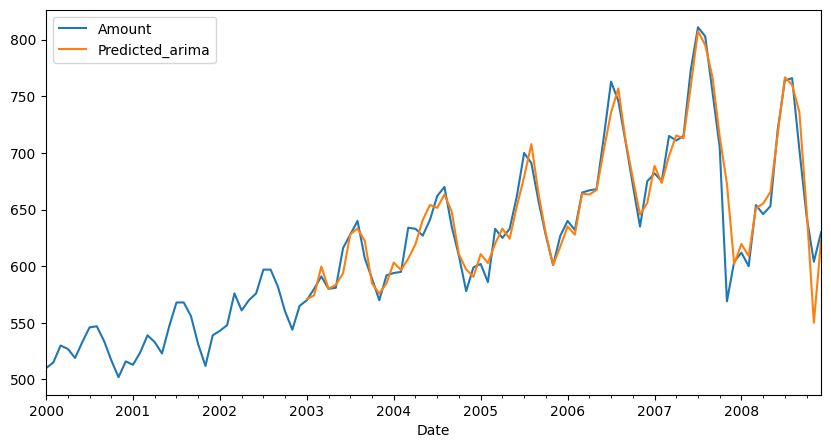

In [69]:
train_data[["Amount","Predicted_arima"]].plot(figsize=(10,5))

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [73]:
smodel = SARIMAX(train_data["Amount"],order=(2,0,4),seasonal_order=(0,1,0,12))

In [75]:
model = smodel.fit()

In [79]:
predicted = model.predict(start=datetime(2003,1,1),end=datetime(2008,12,1))

In [81]:
train_data["predicted"] = predicted

In [83]:
train_data

,Amount,First Difference,Second Difference,Seasonal Difference,Predicted_arima,predicted
Date,,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.077838,763.089138
2008-09-01,703,-63.0,-65.0,-51.0,736.171677,722.759856
2008-10-01,644,-59.0,4.0,-61.0,649.999135,664.085820


<Axes: xlabel='Date'>

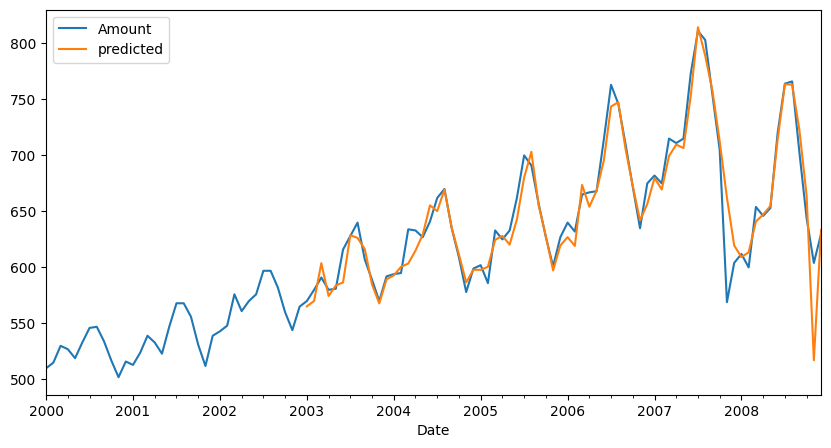

In [89]:
train_data[["Amount","predicted"]].plot(figsize=(10,5))

2009-01-01    646.927687
2009-02-01    626.915521
2009-03-01    685.770007
2009-04-01    679.601770
2009-05-01    686.549359
2009-06-01    752.073178
2009-07-01    793.582642
2009-08-01    792.431046
2009-09-01    725.914079
2009-10-01    663.271176
2009-11-01    619.688940
2009-12-01    642.306004
Freq: MS, Name: predicted_mean, dtype: float64

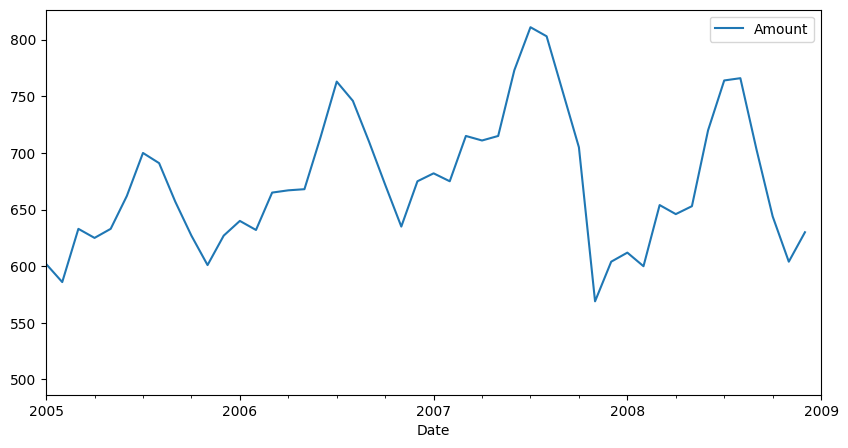

In [101]:
predicted1 = model.predict(start = datetime(2009,1,1),end=datetime(2009,12,1))
train_data["predicted1"]=predicted1
train_data[["Amount"]].plot(xlim=["2005-01-01","2009-01-01"],figsize=(10,5))
predicted1

<Axes: >

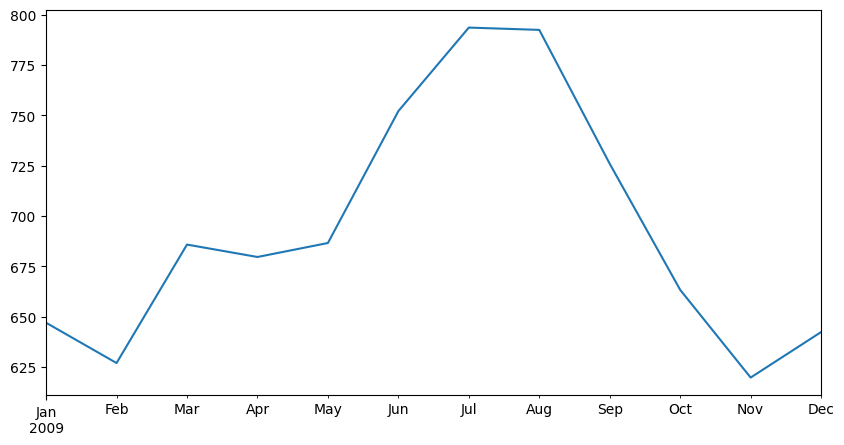

In [103]:
predicted1.plot(figsize=(10,5))

In [105]:
train_data

,Amount,First Difference,Second Difference,Seasonal Difference,Predicted_arima,predicted,predicted1
Date,,,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.077838,763.089138,NaN
2008-09-01,703,-63.0,-65.0,-51.0,736.171677,722.759856,NaN
2008-10-01,644,-59.0,4.0,-61.0,649.999135,664.085820,NaN
